In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from datetime import datetime
import numpy as np

import warnings
warnings.simplefilter('ignore')

from utils import get_dataframe

In [4]:
data = get_dataframe(solar_noon_altitudes=True)
data.head()

,Datum und Uhrzeit,Gesamtanlage[kWh],FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,Solar noon altitudes
0,01.01.2019,1.71013,15.2,4.8,1.6,8,0.0,0,7.9,7.1,965.6,4.1,87.0,5.2,2.7,1.9,0.328030
1,02.01.2019,0.02722,17.0,6.0,0.6,8,0.7,0,7.0,5.0,965.5,0.4,78.0,3.2,-2.1,-4.8,0.329488
2,03.01.2019,0.49862,10.1,4.1,0.0,8,2.9,0,7.4,3.9,971.2,-1.9,73.0,-0.6,-3.1,-4.4,0.331079
3,04.01.2019,0.00908,12.1,4.2,5.0,8,0.0,0,7.7,4.8,970.3,-1.1,85.0,-0.3,-1.7,-2.2,0.332803
4,05.01.2019,0.00005,16.1,6.5,22.1,8,0.0,5,7.6,5.9,963.8,0.0,96.0,1.0,-0.9,-0.8,0.334658


In [5]:
# add column for year, month and day of the year
# convert "Datum und Uhrzeit" column to date
data["Date"] = [datetime.strptime(data["Datum und Uhrzeit"][i], "%d.%m.%Y") for i in range(len(data))]
data["Year"] = data["Date"].dt.year
data["Day of year"] = data["Date"].dt.dayofyear
data["Month"] = data["Date"].dt.month
data = data.drop("Date", axis=1)

In [6]:
# PVGIS estimates of solar electricity generation
kWp_system = 0.310 * 22
estimates_data = {"Jan": 19.4, "Feb": 34.7, "Mar": 74.4, "Apr": 102, "May": 120, "Jun": 124, "Jul": 126, 
                  "Aug": 106, "Sep": 75.0, "Oct": 47.8, "Nov": 23.7, "Dec": 15.8}
estimates = pd.DataFrame.from_dict(estimates_data, orient="index", columns=["kWh (1kWp)"])
estimates["Month"] = np.arange(1, 13)
estimates["Gesamtanlage[kWh]"] = estimates["kWh (1kWp)"] * kWp_system
estimates

,kWh (1kWp),Month,Gesamtanlage[kWh]
Jan,19.4,1,132.308
Feb,34.7,2,236.654
Mar,74.4,3,507.408
Apr,102.0,4,695.640
May,120.0,5,818.400
Jun,124.0,6,845.680
Jul,126.0,7,859.320
Aug,106.0,8,722.920
Sep,75.0,9,511.500
Oct,47.8,10,325.996


In [7]:
# total energy production per month
production = []
for year in data["Year"].unique():
    year_data = data[data["Year"] == year]
    month_data = year_data.groupby(by="Month").sum()["Gesamtanlage[kWh]"].reset_index()
    month_data["Year"] = year
    production.append(month_data)
monthly_production = pd.concat(production)
monthly_production.reset_index(drop=True)

,Month,Gesamtanlage[kWh],Year
0,1,78.06257,2019
1,2,281.71406,2019
2,3,526.10796,2019
3,4,754.28299,2019
4,5,812.45384,2019
5,6,1102.89153,2019
6,7,946.61305,2019
7,8,784.25607,2019
8,9,567.57438,2019
9,10,310.81262,2019


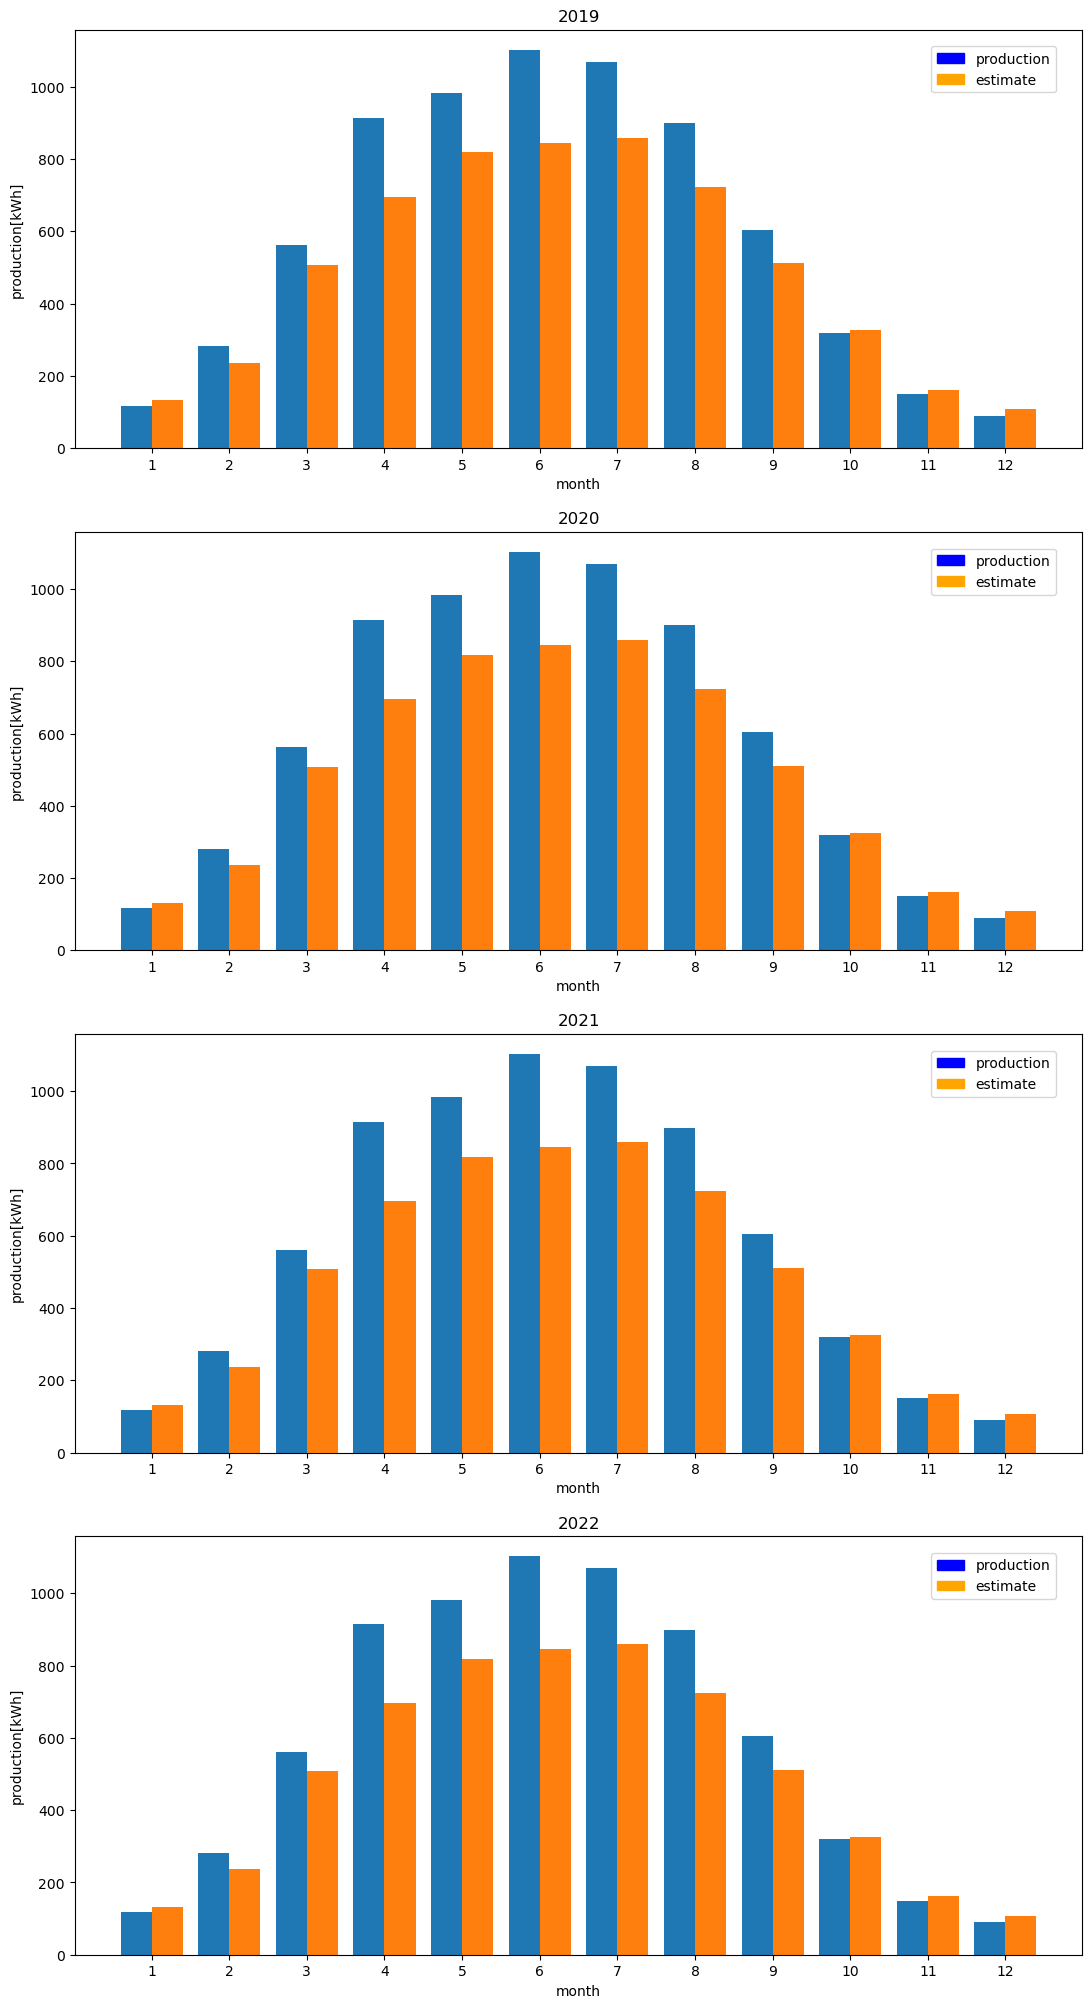

In [8]:
fig, axes = plt.subplots(4, 1, figsize=(13,25), sharey=False)
i = 0
for year in monthly_production["Year"].unique():
    ax = axes.flatten()[i]
    year_data = monthly_production[monthly_production["Year"] == year]
    ax.bar(monthly_production["Month"]-0.2,monthly_production["Gesamtanlage[kWh]"], width=0.4)
    ax.bar(estimates["Month"]+0.2, estimates["Gesamtanlage[kWh]"], width=0.4)
    ax.set_xticks(np.arange(1, 13))
    i+=1
    ax.set_xlabel("month")
    ax.set_ylabel("production[kWh]")
    ax.set_title(year)

    # legend
    colors = {'production': 'blue', 'estimate': 'orange'}
    patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
    ax.legend(handles=patch, loc=(0.85,0.85))

In [9]:
res = np.divide(data["Gesamtanlage[kWh]"], data["SDK"], out=np.zeros_like(data["Gesamtanlage[kWh]"]), where=data["SDK"]!=0) / 22

In [10]:
res

0       0.000000
1       0.001768
2       0.007815
3       0.000000
4       0.000000
          ...   
1456    0.035272
1457    0.052067
1458    0.057059
1459    0.029214
1460    0.060326
Length: 1461, dtype: float64